# CME538 - Introduction to Data Science
## Lecture 7.1 - Linear Regression

## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import plotly.graph_objs as go
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install statsmodels

# Import Tips Data
Let's import out tips dataset from `Seaborn`.

In [3]:
tips = sns.load_dataset('tips')
tips = tips.iloc[0:-1]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Add a column representing the tip percentage.

In [4]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Plot total bill and tip amount.

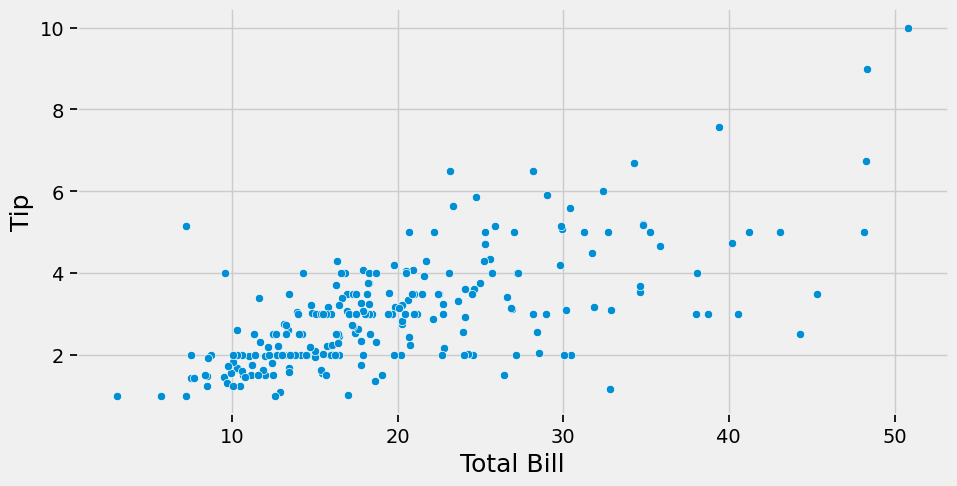

In [6]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = tips['total_bill'], y = tips['tip'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Total Bill', fontsize=18)
ax.set_ylabel('Tip', fontsize=18)
plt.show()

# Graph Averages
Create a function to compute averages for a bin size of 5.

In [7]:
def predict_mean_y(x):
    return tips.loc[np.abs(tips['total_bill'] - x) <= 2.5, 'tip'].mean()

Compute the averages.

In [8]:
tips['tip_predicted'] = tips['total_bill'].apply(predict_mean_y)

Plot the average values along with the raw data.

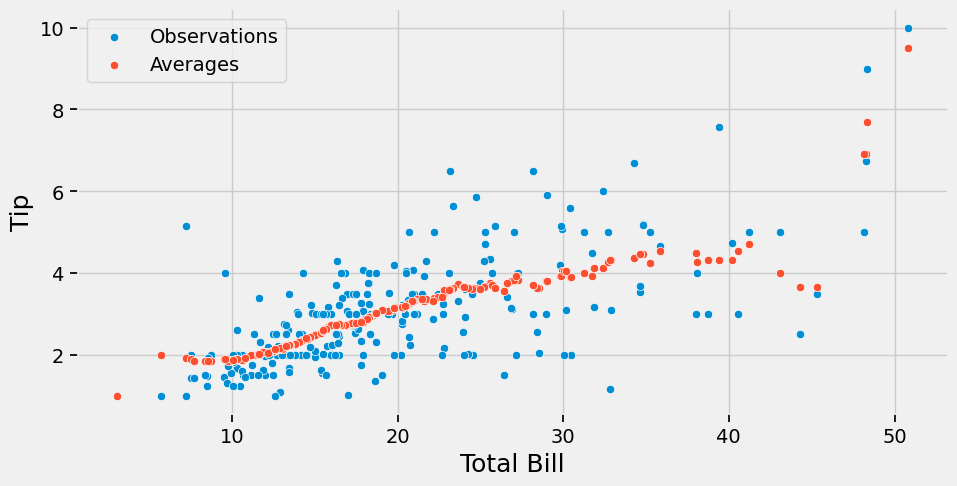

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = tips['total_bill'], y = tips['tip'], label='Observations')
sns.scatterplot(x = tips['total_bill'], y = tips['tip_predicted'], ax=ax, label='Averages')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Total Bill', fontsize=18)
ax.set_ylabel('Tip', fontsize=18)
ax.legend(fontsize=14)
plt.show()

# Linear Fit

In [12]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(tips['total_bill'].values.reshape(-1, 1), tips['tip'].values.reshape(-1, 1))
y_fitted = linear_model.predict(tips['total_bill'].values.reshape(-1, 1))

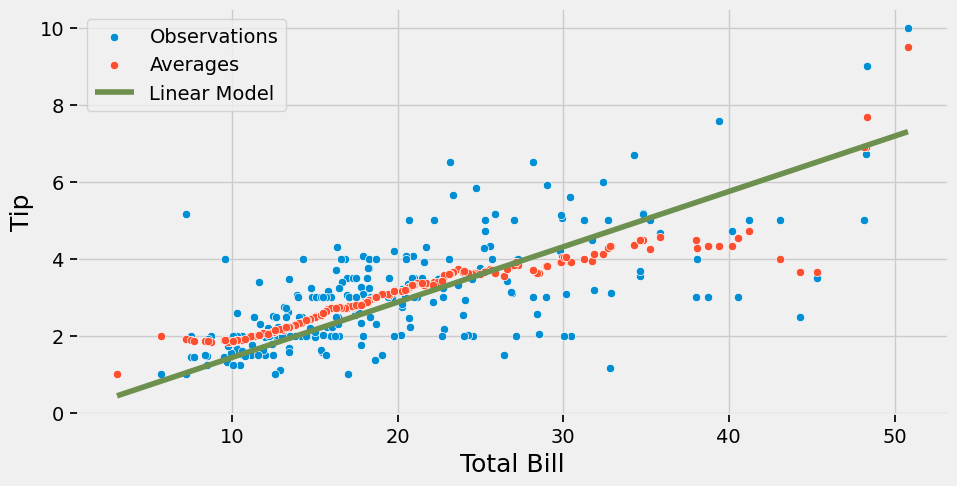

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = tips['total_bill'], y = tips['tip'], label='Observations')
sns.scatterplot(x = tips['total_bill'], y= tips['tip_predicted'], ax=ax, label='Averages')
sns.lineplot(x = tips['total_bill'], y= y_fitted.flatten(), color='#6d904f', ax=ax, label='Linear Model', lw=4)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Total Bill', fontsize=18)
ax.set_ylabel('Tip', fontsize=18)
ax.legend(fontsize=14)
plt.show()

# Correlation 

In [16]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, cov, 100).T

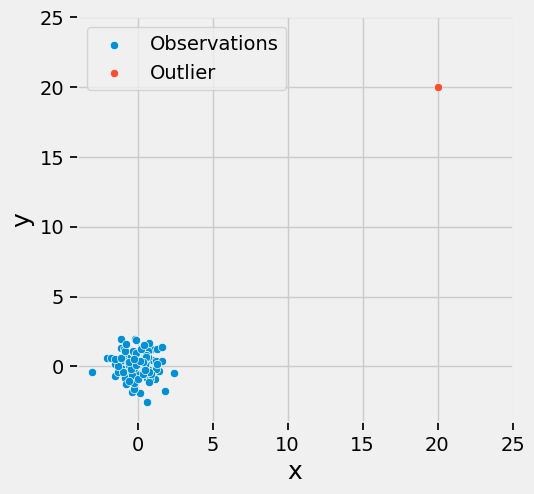

In [18]:
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x = x, y = y, label='Observations')
sns.scatterplot(x = [20], y = [20], label='Outlier')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_xlim([-4, 25])
ax.set_ylim([-4, 25])
ax.legend(fontsize=14, loc=2)
plt.show()

In [19]:
# Correlation not including the outlier
np.corrcoef(x, y)

array([[ 1.        , -0.06673189],
       [-0.06673189,  1.        ]])

In [20]:
# Correlation including the outlier
x = x.tolist()
x.extend([20])
y = y.tolist()
y.extend([20])

np.corrcoef(x, y)

array([[1.        , 0.81239237],
       [0.81239237, 1.        ]])

# Height Weight Dataset

In [21]:
height_weight = pd.read_csv('height_weight_train.csv')
height_weight.head()

,Id,height,weight
0,1,70.49366,129.3840
1,2,65.23482,104.5786
2,3,67.59619,131.7669
3,4,68.51919,135.0276
4,5,67.07600,118.4065


In [22]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(height_weight['weight'].values.reshape(-1, 1), 
                 height_weight['height'].values.reshape(-1, 1))
y_fitted = linear_model.predict(height_weight['weight'].values.reshape(-1, 1))

In [23]:
linear_model.coef_[0][0]

0.08186549625414624

In [24]:
linear_model.intercept_[0]

57.590342511633395

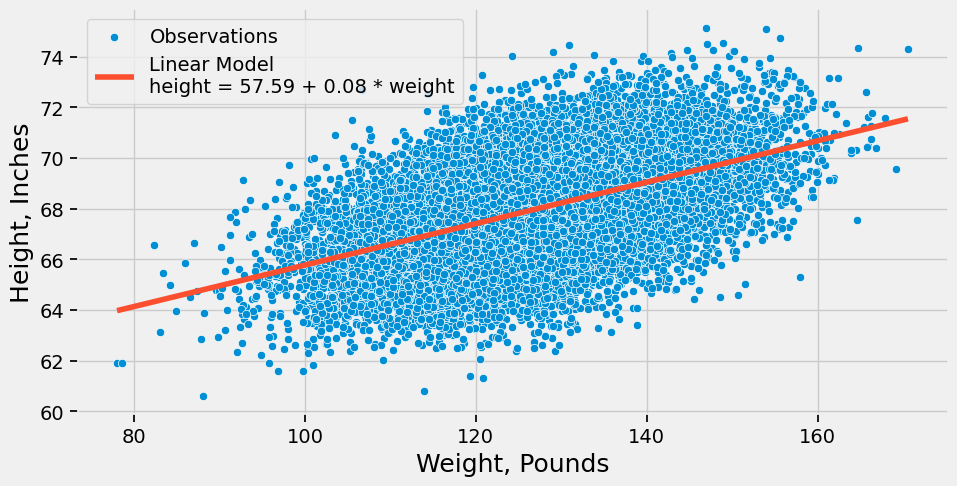

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = height_weight['weight'],y = height_weight['height'], label='Observations')
sns.lineplot(x = height_weight['weight'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model\nheight = {:.2f} + {:.2f} * weight'.format(linear_model.intercept_[0], linear_model.coef_[0][0]), lw=4)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Weight, Pounds', fontsize=18)
ax.set_ylabel('Height, Inches', fontsize=18)
ax.legend(fontsize=14)
plt.show()

# NBA Dataset

In [28]:
nba = pd.read_csv('nba.csv')[['AST', '3PA', 'PTS']]
nba.head()

,AST,3PA,PTS
0,0.6,4.1,5.3
1,0.8,1.5,1.7
2,1.9,2.2,3.2
3,1.6,0.0,13.9
4,2.2,0.2,8.9


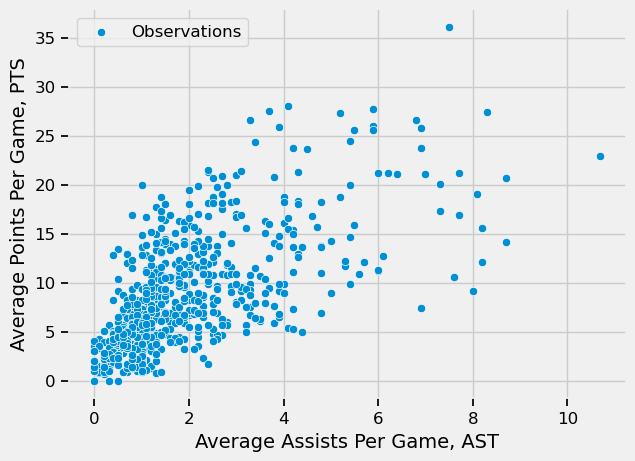

In [29]:
ax = sns.scatterplot(x = nba['AST'], y = nba['PTS'], label='Observations')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Average Assists Per Game, AST', fontsize=14)
ax.set_ylabel('Average Points Per Game, PTS', fontsize=14)
ax.legend(fontsize=12)
plt.show()

In [30]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(nba[['AST']], nba[['PTS']])
y_fitted = linear_model.predict(nba[['AST']])

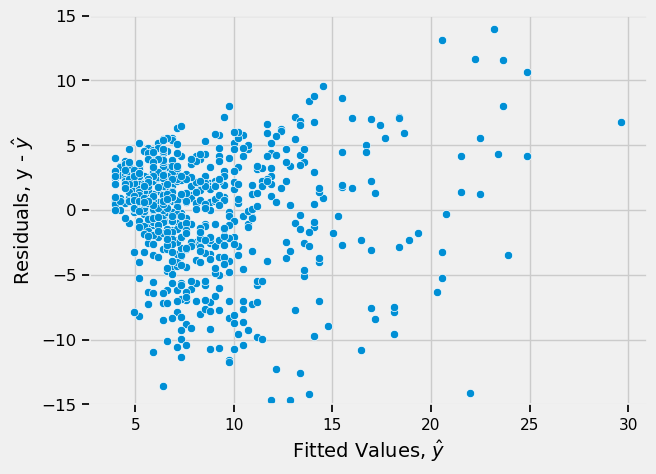

In [31]:
ax = sns.scatterplot(x = y_fitted.flatten(), y = y_fitted.flatten() - nba['PTS'])
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Fitted Values, $\^{y}$', fontsize=14)
ax.set_ylabel('Residuals, y - $\^{y}$', fontsize=14)
ax.set_ylim([-15, 15])
plt.show()

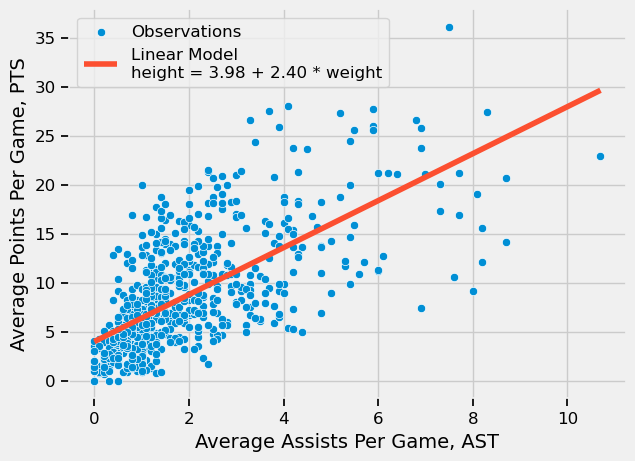

In [32]:
ax = sns.scatterplot(x = nba['AST'], y = nba['PTS'], label='Observations')
sns.lineplot(x = nba['AST'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model\nheight = {:.2f} + {:.2f} * weight'.format(linear_model.intercept_[0], linear_model.coef_[0][0]), lw=4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Average Assists Per Game, AST', fontsize=14)
ax.set_ylabel('Average Points Per Game, PTS', fontsize=14)
ax.legend(fontsize=12)
plt.show()

In [33]:
def rmse(y, yhat):
    return mse(y, yhat)**0.5

def mse(y, yhat):
    return np.mean((y - yhat)**2)

In [34]:
rmse(nba['PTS'], y_fitted.flatten())

4.291659114148544

In [35]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(nba[['AST', '3PA']], nba['PTS'])
y_fitted = linear_model.predict(nba[['AST', '3PA']])

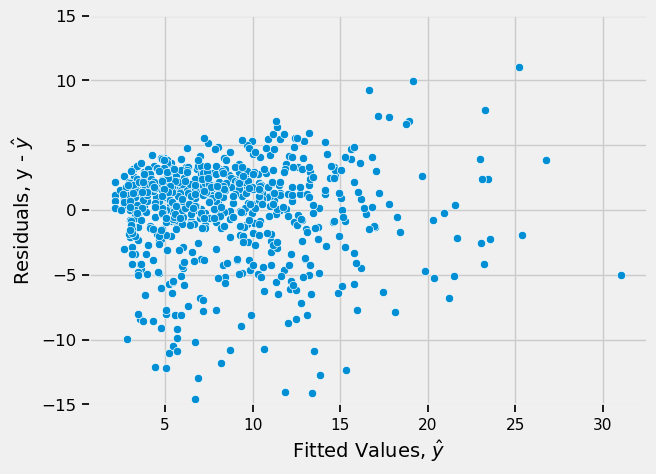

In [36]:
ax = sns.scatterplot(x = y_fitted.flatten(), y = y_fitted.flatten() - nba['PTS'])
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Fitted Values, $\^{y}$', fontsize=14)
ax.set_ylabel('Residuals, y - $\^{y}$', fontsize=14)
ax.set_ylim([-15, 15])
plt.show()

In [37]:

fig = go.Figure()

nba_data_raw = go.Scatter3d(x = nba['AST'], y = nba['3PA'], z = nba['PTS'],
                            mode = 'markers', marker=dict(color='cornflowerblue', size = 5, symbol='circle-open'), 
                            name = 'actual')

num_points = 100
xvalues = np.linspace(0, 11, num_points)
yvalues = np.linspace(0, 10, num_points)
(u,v) = np.meshgrid(xvalues, yvalues)
ast3pa = np.vstack((u.flatten(),v.flatten()))

pred_pts = np.array([linear_model.predict(coord.reshape(1, -1)) for coord in ast3pa.T])

loss_surface = go.Surface(x=u, y=v, z=np.reshape(pred_pts, u.shape), name = 'predicted')

fig.add_trace(loss_surface)
fig.add_trace(nba_data_raw)

fig.update_layout(scene = dict(
    xaxis_title = "AST",
    yaxis_title = "3PA",
    zaxis_title = "PTS"))

fig.show()

In [38]:
linear_model.coef_

array([1.64065507, 1.25758096])

In [39]:
linear_model.intercept_

2.156347047514835

In [40]:
rmse(nba['PTS'], y_fitted.flatten())

3.6427935954265123

# Air Quality Dataset

In [41]:
air_quality = pd.read_csv('air_quality.csv', index_col=0).dropna()

air_quality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


In [42]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(air_quality[['Wind']], air_quality[['Ozone']])
y_fitted = linear_model.predict(air_quality[['Wind']])

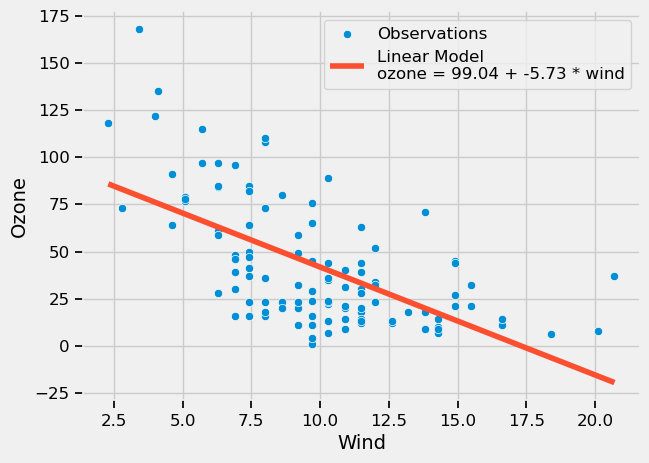

In [43]:
ax = sns.scatterplot(x = air_quality['Wind'], y = air_quality['Ozone'], label='Observations')
sns.lineplot(x = air_quality['Wind'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax,
             label='Linear Model\nozone = {:.2f} + {:.2f} * wind'.format(linear_model.intercept_[0], linear_model.coef_[0][0]), lw=4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Wind', fontsize=14)
ax.set_ylabel('Ozone', fontsize=14)
ax.legend(fontsize=12)
plt.show()

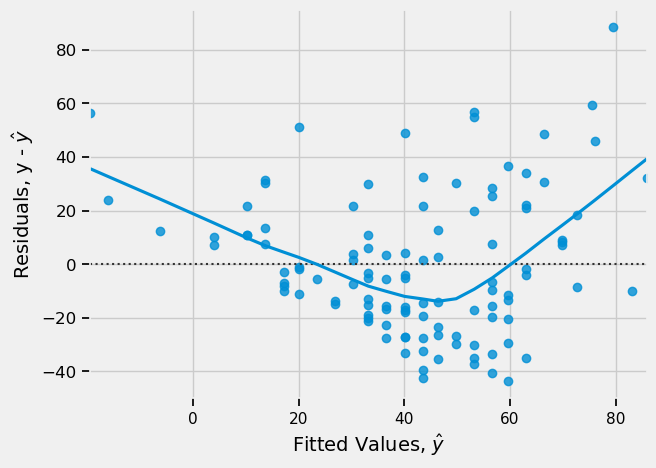

In [45]:
ax = sns.residplot(x = y_fitted.flatten(), 
              y = air_quality['Ozone'], 
              lowess=True)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Fitted Values, $\^{y}$', fontsize=14)
ax.set_ylabel('Residuals, y - $\^{y}$', fontsize=14);

In [46]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(air_quality[['Temp']], air_quality[['Ozone']])
y_fitted = linear_model.predict(air_quality[['Temp']])

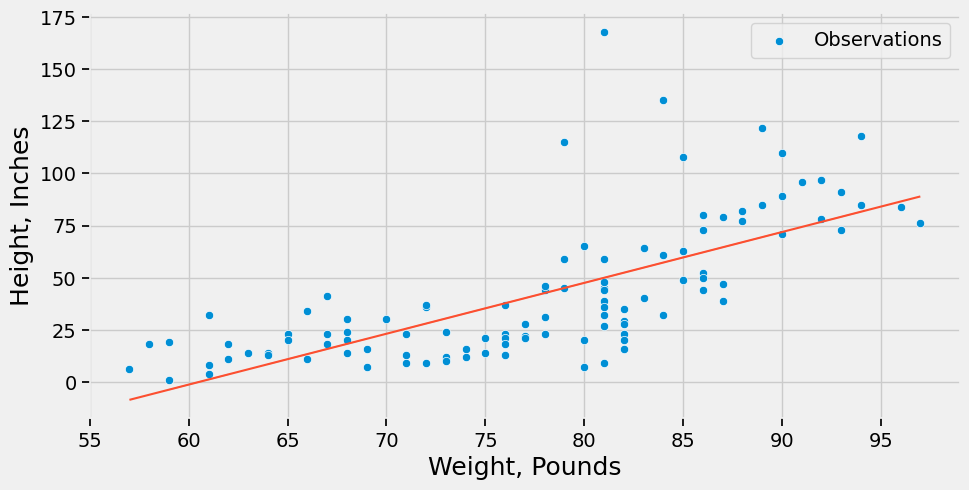

In [47]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = air_quality['Temp'], y = air_quality['Ozone'], label='Observations')
sns.lineplot(x = air_quality['Temp'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Weight, Pounds', fontsize=18)
ax.set_ylabel('Height, Inches', fontsize=18)
ax.legend(fontsize=14)
plt.show()

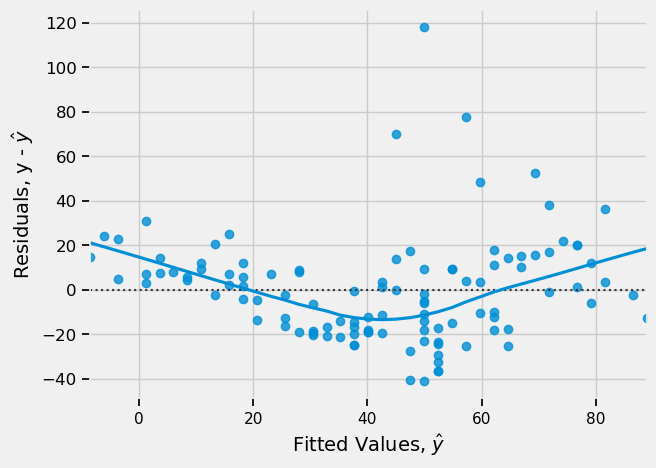

In [48]:
ax = sns.residplot(x = y_fitted.flatten(), 
              y = air_quality['Ozone'], 
              lowess=True)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Fitted Values, $\^{y}$', fontsize=14)
ax.set_ylabel('Residuals, y - $\^{y}$', fontsize=14);

In [49]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(air_quality[['Wind', 'Solar.R', 'Temp']], air_quality[['Ozone']])
y_fitted = linear_model.predict(air_quality[['Wind', 'Solar.R', 'Temp']])

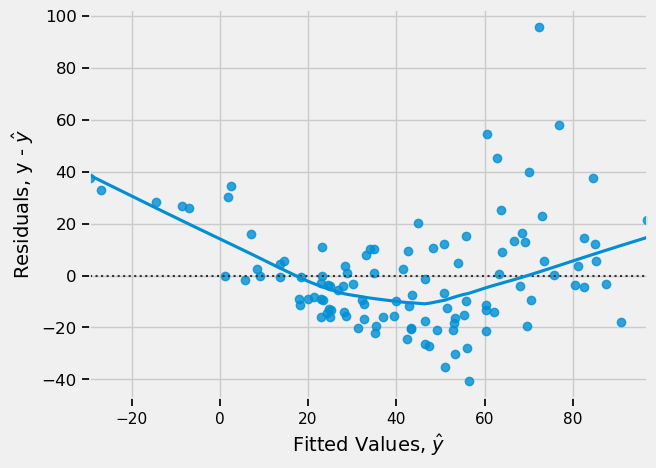

In [50]:
ax = sns.residplot(x = y_fitted.flatten(), 
              y = air_quality['Ozone'], 
              lowess=True)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Fitted Values, $\^{y}$', fontsize=14)
ax.set_ylabel('Residuals, y - $\^{y}$', fontsize=14);

# R^2

In [51]:
def generate_dataset_simple(slope, n, std_dev):
    x = np.round(np.random.random(n) * 50)
    e = np.random.randn(n) * std_dev
    y = x * slope + e
    
    return x, y

In [52]:
slope = 5
n = 20
std_dev = 25
x, y = generate_dataset_simple(slope, n, std_dev)

In [53]:
data = pd.DataFrame({'salary': y, 
                     'years of experience': x, 
                     'height': height_weight.sample(n)['height'].values})
data.head()

,salary,years of experience,height
0,141.550415,22.0,69.76571
1,50.286163,7.0,67.59652
2,108.755832,26.0,72.06918
3,195.091186,38.0,68.36515
4,182.934830,39.0,69.29251


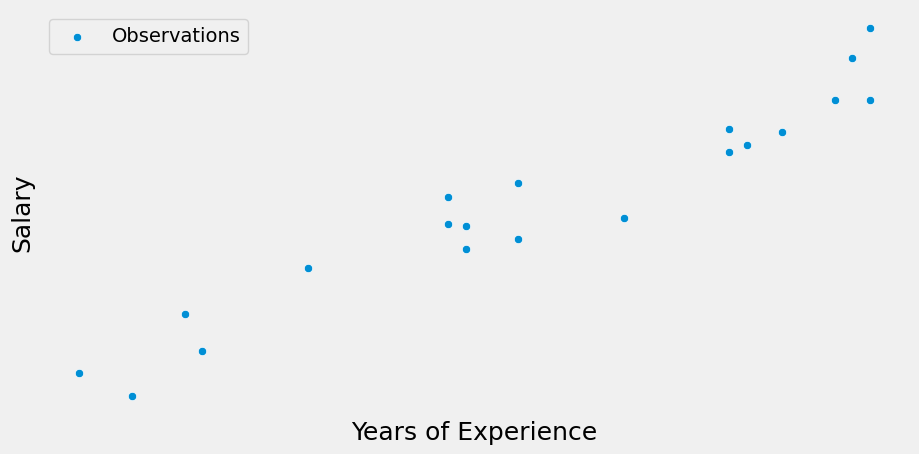

In [54]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['years of experience'], y = data['salary'], 
                     label='Observations')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Years of Experience', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

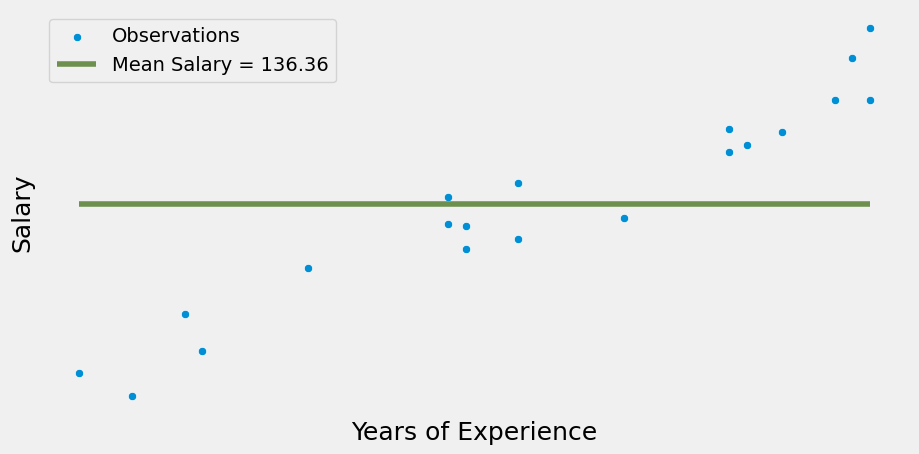

In [55]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['years of experience'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['years of experience'], y = np.ones(len(data['salary']))*data['salary'].mean(), color='#6d904f', 
             label='Mean Salary = {:.2f}'.format(data['salary'].mean()), lw=4)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Years of Experience', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

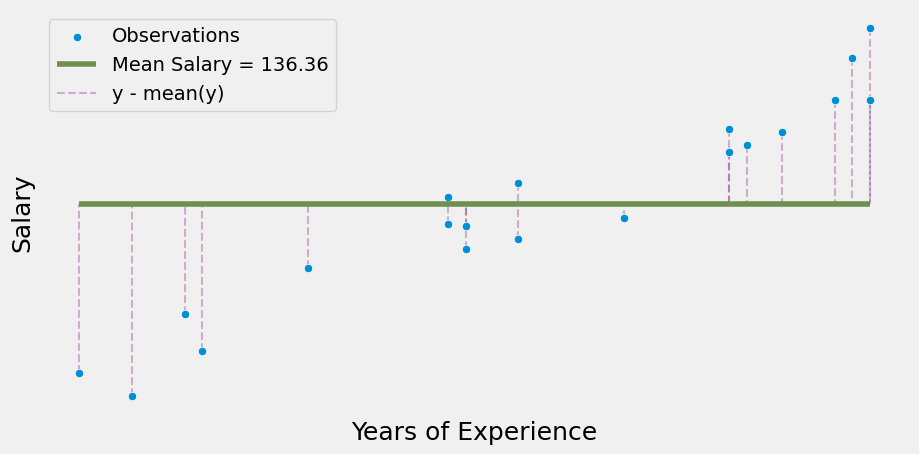

In [56]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['years of experience'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['years of experience'], y = np.ones(len(data['salary']))*data['salary'].mean(), color='#6d904f', 
             label='Mean Salary = {:.2f}'.format(data['salary'].mean()), lw=4)
ax.vlines(data['years of experience'], ymin=data['salary'], 
          ymax=np.ones(len(data['salary']))*data['salary'].mean(), 
          linestyle='dashed', color='#810f7c',alpha=0.3, zorder=0, 
          label='y - mean(y)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Years of Experience', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

In [57]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(data[['years of experience']], 
                 data[['salary']])
y_fitted = linear_model.predict(data[['years of experience']])

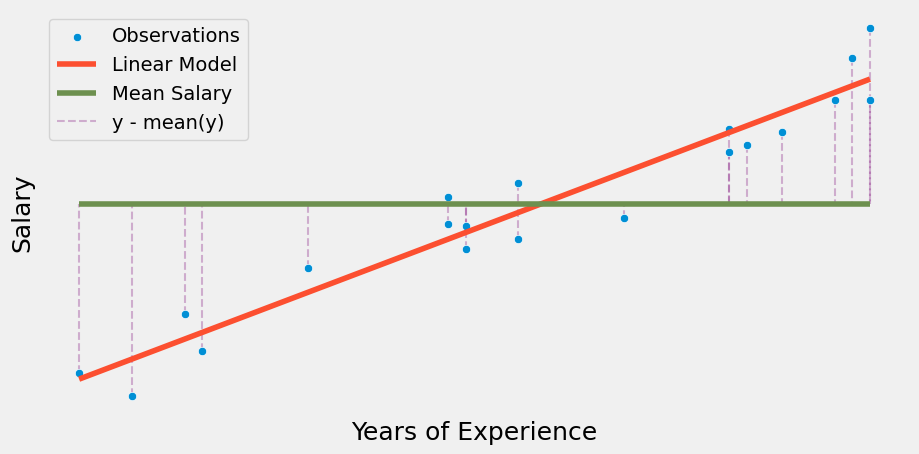

In [58]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['years of experience'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['years of experience'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model', lw=4)
sns.lineplot(x = data['years of experience'], 
             y = np.ones(len(data['salary']))*data['salary'].mean(), 
             color='#6d904f', label='Mean Salary', lw=4)
ax.vlines(data['years of experience'], ymin=data['salary'], 
          ymax=np.ones(len(data['salary']))*data['salary'].mean(), 
          linestyle='dashed', color='#810f7c',alpha=0.3, zorder=0, 
          label='y - mean(y)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Years of Experience', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

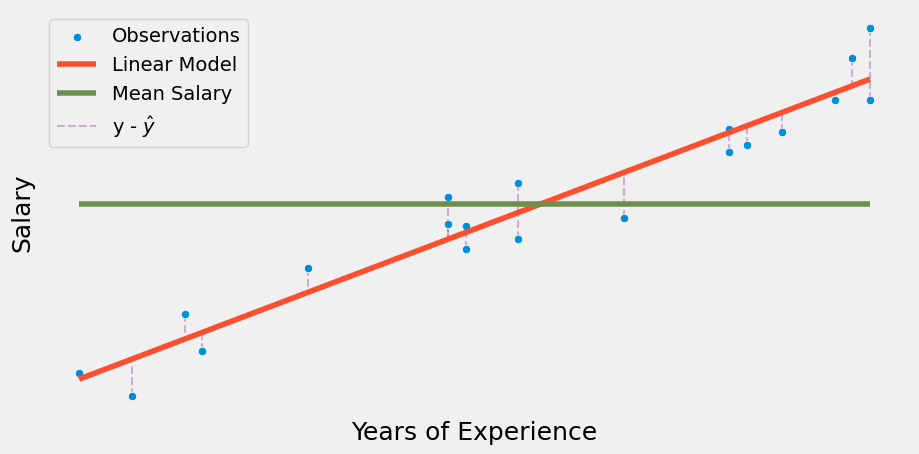

In [59]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['years of experience'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['years of experience'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model', lw=4)
sns.lineplot(x = data['years of experience'], 
             y = np.ones(len(data['salary']))*data['salary'].mean(), 
             color='#6d904f', label='Mean Salary', lw=4)
ax.vlines(data['years of experience'], ymin=data['salary'], 
          ymax=linear_model.intercept_[0] + data['years of experience']*linear_model.coef_[0], 
          linestyle='dashed', color='#810f7c',alpha=0.3, zorder=0, 
          label='y - $\^{y}$')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Years of Experience', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

In [60]:
r2_score(data['salary'], linear_model.intercept_[0] + data['years of experience']*linear_model.coef_[0])

0.9299494942084452

In [61]:
var_salary = np.sum((data['salary'] - data['salary'].mean())**2)

In [62]:
var_model = np.sum((data['salary'] - (linear_model.intercept_[0] + data['years of experience']*linear_model.coef_[0]))**2)

In [63]:
1 - (var_model/var_salary)

0.9299494942084452

In [64]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(data[['height']], 
                 data[['salary']])
y_fitted = linear_model.predict(data[['height']])

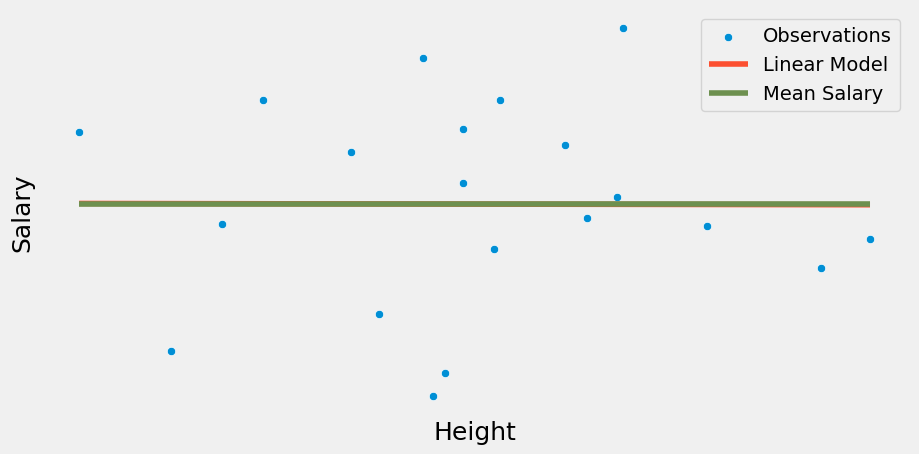

In [65]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['height'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['height'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model', lw=4)
sns.lineplot(x = data['height'], 
             y = np.ones(len(data['salary']))*data['salary'].mean(), 
             color='#6d904f', label='Mean Salary', lw=4)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Height', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

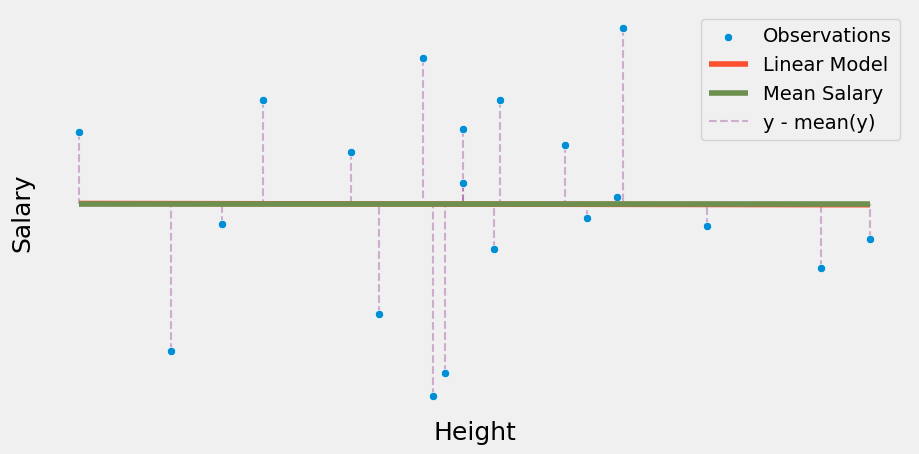

In [66]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['height'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['height'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model', lw=4)
sns.lineplot(x = data['height'], 
             y = np.ones(len(data['salary']))*data['salary'].mean(), 
             color='#6d904f', label='Mean Salary', lw=4)
ax.vlines(data['height'], ymin=data['salary'], 
          ymax=np.ones(len(data['salary']))*data['salary'].mean(), 
          linestyle='dashed', color='#810f7c',alpha=0.3, zorder=0, 
          label='y - mean(y)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Height', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

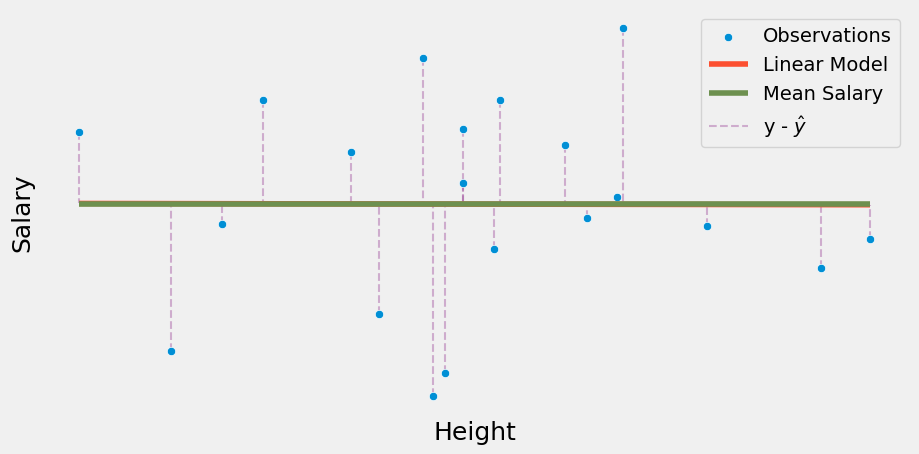

In [67]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['height'], y = data['salary'], 
                     label='Observations')
sns.lineplot(x = data['height'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, 
             label='Linear Model', lw=4)
sns.lineplot(x = data['height'], 
             y = np.ones(len(data['salary']))*data['salary'].mean(), 
             color='#6d904f', label='Mean Salary', lw=4)
ax.vlines(data['height'], ymin=data['salary'], 
          ymax=linear_model.intercept_[0] + data['height']*linear_model.coef_[0], 
          linestyle='dashed', color='#810f7c',alpha=0.3, zorder=0, 
          label='y - $\^{y}$')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Height', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
plt.show()

In [68]:
r2_score(data['salary'], linear_model.intercept_[0] + data['height']*linear_model.coef_[0])

1.0305504353103068e-05

In [69]:
var_salary = np.sum((data['salary'] - data['salary'].mean())**2)

In [70]:
var_model = np.sum((data['salary'] - (linear_model.intercept_[0] + data['height']*linear_model.coef_[0]))**2)

In [71]:
1 - (var_model/var_salary)

1.0305504353103068e-05

# Scikit-Learn API

In [72]:
data.head()

,salary,years of experience,height
0,141.550415,22.0,69.76571
1,50.286163,7.0,67.59652
2,108.755832,26.0,72.06918
3,195.091186,38.0,68.36515
4,182.934830,39.0,69.29251


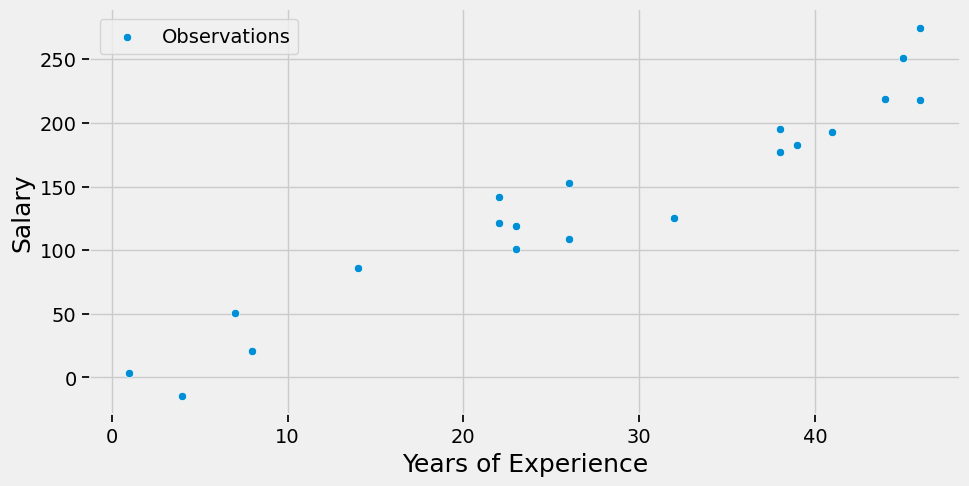

In [73]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = data['years of experience'], y = data['salary'], 
                     label='Observations')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Years of Experience', fontsize=18)
ax.set_ylabel('Salary', fontsize=18)
ax.legend(fontsize=14)
plt.show()

### Step1: Choose a class of model

In [74]:
from sklearn.linear_model import LinearRegression

### Step2: Choose model hyperparameters

In [75]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Step3: Arranging the data

In [76]:
X = data[['years of experience']]
y = data[['salary']]

### Step4: Model Fitting

In [77]:
model.fit(X, y)

LinearRegression()

In [78]:
model.coef_

array([[5.2381021]])

In [79]:
model.intercept_

array([-6.37755703])

### Step5: Applying the model

In [80]:
y_fitted = model.predict(data[['years of experience']])

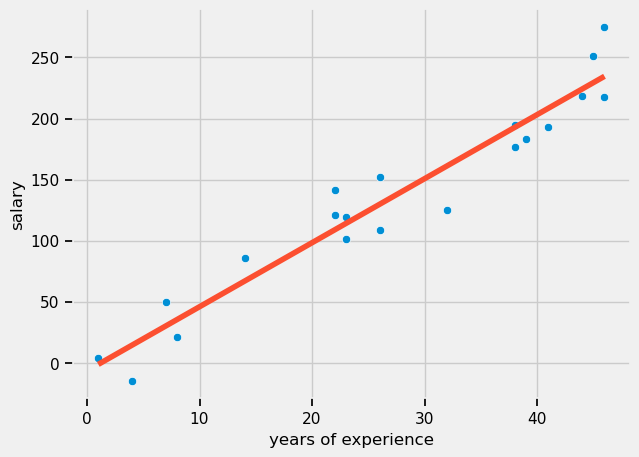

In [81]:
ax = sns.scatterplot(x = data['years of experience'], 
                     y = data['salary'])
sns.lineplot(x = data['years of experience'], 
             y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax, lw=4);